
# Práce s Jupyter notebooky

## Předpoklady

- naklonovaný Git repozitář z [fakultního GitLabu](https://gitlab.fit.cvut.cz/bi-svz/bi-svz)
- nastaveno SVZ prostředí pro Anacondu podle [návodu](https://gitlab.fit.cvut.cz/bi-svz/bi-svz/blob/master/tutorials/files/1/course-tools-introduction.adoc#user-content-rozchozen%C3%AD-virtuáln%C3%ADho-prostřed%C3%AD-pro-práci-v-pythonu-s-jupyter-notebooky) z předešlého cvičení

## Rekapitulace

- (git-cmd) `git clone https://gitlab.fit.cvut.cz/bi-svz/bi-svz.git` nebo `git pull origin master`
- (Anaconda Prompt) `conda activate SVZ`
- (Anaconda Prompt) `jupyter notebook`

# Co je Jupyter a IPython?


<img src="jupyter-logo.svg" style="width: 250px;"/>

Jupyter notebook je webová aplikace pro interaktivní programování, zaznamenávání, vizualizaci a prezentace výsledků. Typicky se používá při analýze dat, problémech počítačového vidění, ale také pro matematické úkoly a třeba i trénovaní neurónových sítí.

Jupyter je platforma kolem Jupyter notebooku, která se kromě notebooku stará o různá rozšírení, kolaboraci a nasazení do různých prostrředí. Více detailů na webu [jupyter.org](https://jupyter.org)

Jupyter vznikl jako nadstavba nad IPython notebook, který v "data" světě začali používat také programátori v Julii a Rku. Proto Ju(lia) - Py(thon) - e(R) = Jupyter.

V Jupyter notebooku se používají dva typy buněk — textové a kód. Kód je v našem případe Pythoní, no ve standardní instalaci Jupyteru je možné přepnout na jazyk Julia a nebo R. Existují také rozšíření do pro další jazyky.

Kromě kódu a text v markdownu je možné použít HTML a zpouštět také systémové příkazy.

## Zkratky

Jupyter rozlišuje dva módy - **Command** a **Edit**. V Command módu jsou jedno a více-písmenové zkratky na zrychlení práce pro úpravu buněk, evaluaci a pod.

- přístup ke všem příkazům `CTRL`+`SHIFT`+`P`


- přepnutí mezi módy Command -> Edit `ENTER`


- přepnutí mezi módy Edit -> Command `ESC`


- šipky zaručí pohyb mezi buňkami


- vložení buňky
  - `A` nad aktuální
  - `B` pod aktuální
  - `SHIFT`+`M` spojení buňek


- zmazání buňky `d d`


- změna typu buňky
  - `M` markdown
  - `Y` code
  - `1` nadpis 1
  - `2` nadpis 2


- evaluace
  - `SHIFT`+`ENTER` evaluace aktuální buňky
  - `CTRL`+`ENTER` evaluace označených buněk

## IPython triky

- magické příkazy
  - load externého skriptu (třeba s definicemi funkcí)
  - interaktivní matplotlib
  - timing
  - html
  - aliasy, makra, debugger, pip, conda
  - celý seznam [v dokumentaci](https://ipython.readthedocs.io/en/stable/interactive/magics.html)


- snapshoty a uložení výsledků

- nápověda příkazem `?`

In [163]:
%%html
<!-- ukážka magického příkazu a html v notebooku -->

<div>
  <b>HTML v notebooku:</b>
  <br />
  <div style="height: 200px; width: 200px; background: #f00"></div>
</div>

## Jupyter extensions

Umožňují rozšíření funkcí notebooku, jako třeba možnosti skrýt bloky textu a kódu, hezky zobrazit určité typy dat, měřit čas evaluaci buňky, a pod.

Instalace:

```
pip install jupyter_nbextensions_configurator jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextensions_configurator enable --user
```


## Google Colab

- Jupyter prostředí na steroidech v Google Cloudu
- propojení přes GitHub
- dostupné zdroje na běh zdarma, pro univerzity a výzkum navyše dostupné extra zdroje


- trénovaní NNs na GPU/TPU
  - MNIST + jednoduchá konvoluční neurónová síť


- dotazování na BigQuery datasety
  - počet .js filů ve všetch JS repozitářích na GitHubu
  - zkoumání variantů genómů

In [1]:
%%html
<b>Open in Colab badge:</b>
<a target="_blank" href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.03-Magic-Commands.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

# Příklady


## Vektor a vypsaní grafu z minulého cvičení

In [71]:
import numpy as np

def generate_vector(start, end, step):
    return np.arange(start, end, step)

start = -4*np.pi
end = 4*np.pi
step = 0.01

x = generate_vector(start, end, step)

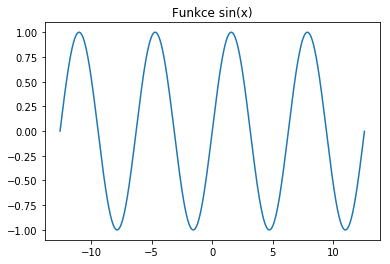

In [72]:
# magický příkaz v akci
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

y = np.sin(x)
plt.title('Funkce sin(x)')
plt.plot(x, y)

### Systémové příkazy

In [35]:
pwd

'/'

In [37]:
# znovu magický příkaz
%cd ..

/Users


In [38]:
pwd

'/Users'

In [51]:
alias home cd ~; pwd

In [52]:
home

/Users/d_rc


### Načení obrázku z disku

Vyzkoušíme si načíst obrázek z disku a jednoduché transformace pomocí knihoven matplotlib a OpenCV. V BI-SVZ budeme používat OpenCV hodně, takže je vhodné se s ní seznámit.

Můžete se podívat na široké možnosti knihovny v její [dokumentaci](https://docs.opencv.org/master/). OpenCV je napsaná v C++, proto definice její API je zdokumentovaná taky pro C++. My budeme používat wrapper pro Python (`opencv-python`), který podporuje ty samé funkce.

In [143]:
imgPath = 'metal.jpg'

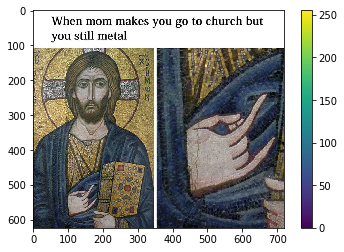

In [149]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(imgPath)
imgplot = plt.imshow(img)

plt.colorbar()
plt.show() 

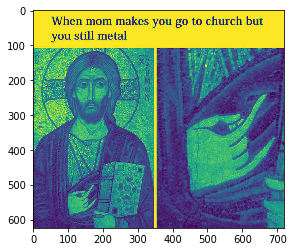

In [150]:
lum_img = img[:,:,0]
imgplot = plt.imshow(lum_img)
plt.show()

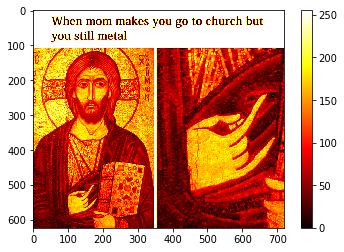

In [151]:
plt.imshow(lum_img, cmap="hot")
plt.colorbar()
plt.show()

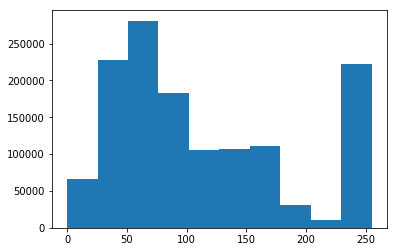

In [153]:
plt.hist(img.ravel())
plt.show()

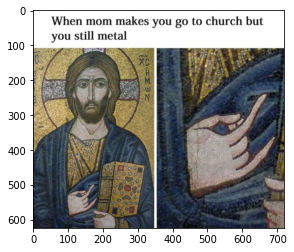

In [141]:
# přes OpenCV (z minulého cvičení)

import cv2
image = cv2.imread(imgPath)

cv2.cvtColor(image, cv2.COLOR_BGR2RGB, image)

plt.imshow(image, interpolation='bilinear')
plt.show()

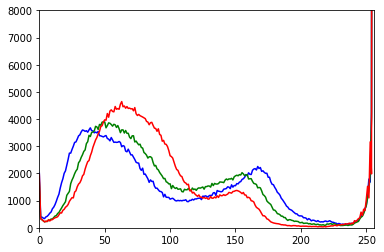

In [165]:
# histogram

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.ylim([0,8000])

plt.show()

# Práce s kamerou Basler v Jupyter Notebooku

![](basler-logo.jpg)

Vzhledem k tomu, že software Pylon je nejen vlastní program pro připojení a manipulaci s kamerami, ale zároveň SDK, budeme používat přímo SDK. SDK je psáno v C, C++ nebo C#. Basler k tomu však v roce 2018 vytvořil wrapper do Pythonu s názvem `pypylon`.

My jsme k tomu vytvořili rozhraní s názvem `pypylon_opencv_viewer`. To umožňuje se připojit ke konkrétní kameře, zobrazit si snímky z kamery a dále nastavovat některé parametry kamery.


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2
import yaml
from pypylon import pylon 

from IPython.display import Image, display, clear_output

%matplotlib inline

In [167]:
serial_number = '21991061' ### vlastní sériové číslo kamery
width = 1280
height = 1080
image_folder = '.' ### defaultní nastavení složky pro ukládání snímků

Připojení kamery pomocí `pypylonu`. Je zapotřebí zkontrolovat sériové číslo kamery.

In [ ]:
# Pypylon gets camera by serial number
info = None
for i in pylon.TlFactory.GetInstance().EnumerateDevices():
    if i.GetSerialNumber() == serial_number:
        info = i
        break
else:
    print('Camera with {} serial number not found'.format(serial_number))

# VERY IMPORTANT STEP! To use Basler PyPylon OpenCV viewer you have to call .Open() method on you camera
if info is not None:
    camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateDevice(info)) 
    camera.Open()

Pomocná funkce pro zobrazování obrázků

In [ ]:
def show_image(img):
    window_name = 'Camera capture (' + serial_number + ')'
    cv2.namedWindow(window_name, cv2.WINDOW_NORMAL | cv2.WINDOW_GUI_NORMAL)
    cv2.resizeWindow(window_name, width, height)
    cv2.imshow(window_name, img)

Vytvoření GUI widgetů pro manipulaci s parametry kamery. Zásady pro tvorbu JSON notace widgetů viz [link](https://github.com/mbalatsko/pypylon-opencv-viewer#list-of-features).

In [160]:
features = [
    {
        "name": "GainRaw",
        "type": "int"
    },
    {
        "name": "ExposureTimeRaw",
        "type": "int",
        "max": 35000,
        "min": 35,
        "step": 140,
        "value": 3500
    },
    {
        "name": "Height",
        "type": "int_text",
        "max": 1200,
        "min": 100,
        "step": "5"
    },
    {
        "name": "Width",
        "type": "int_text",
        "max": 1920,
        "min": 100,
        "step": "5"
    }
]

In [161]:
def impro(img):
    show_image(img)
    return img

## Main
Výkonný kus kódu využívající vlastní knihovnu pro práci s kamerou a knihovnou opencv. Umožňuje nastavení parametrů pomocí GUI widgetů.
- Pro spuštění okna kamery je zapotřebí kliknout na tlačítko `Run Interact`. 
- Okno kamery se vypne stisknutím tlačítka `q`.
- Obrázek se uloží stisknutím tlačítka `s`.
- Pro projevení změn v nastavení pomocí GUI prvků je nutné ukončit okno kamery a znovu ho spustit.

In [ ]:
from pypylon_opencv_viewer import BaslerOpenCVViewer
    
viewer = BaslerOpenCVViewer(camera)
viewer.set_features(features)
viewer.set_impro_function(impro)
viewer.run_interaction_continuous_shot(window_size=(width, height), image_folder=image_folder)

# Zdroje pro samostudium

- Python zpracování obrazu — [opencv](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations), [tesseract](https://github.com/tesseract-ocr/tesseract)
- Python data a strojové učení — pandas, matplotlib, numpy, scipy, scikit, pytorch, tensorflow
- [Markdown cheatsheet](https://www.markdownguide.org/cheat-sheet)